In [75]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *

# LOAN DATASET #

In [76]:
df = spark.read.csv("loan.csv", inferSchema = True, header = True)
dfc = spark.read.csv("credit card.csv", inferSchema = True, header = True)
txn = spark.read.csv("txn.csv", inferSchema=True, header =True)

In [77]:
df.printSchema()

root
 |-- Customer_ID: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Marital Status: string (nullable = true)
 |-- Family Size: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Expenditure: integer (nullable = true)
 |-- Use Frequency: integer (nullable = true)
 |-- Loan Category: string (nullable = true)
 |-- Loan Amount: string (nullable = true)
 |-- Overdue: integer (nullable = true)
 |--  Debt Record: string (nullable = true)
 |--  Returned Cheque: integer (nullable = true)
 |--  Dishonour of Bill: integer (nullable = true)



In [78]:
df.show(5)

+-----------+---+------+------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|Customer_ID|Age|Gender|  Occupation|Marital Status|Family Size|Income|Expenditure|Use Frequency|Loan Category|Loan Amount|Overdue| Debt Record| Returned Cheque| Dishonour of Bill|
+-----------+---+------+------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|    IB14001| 30|  MALE|BANK MANAGER|        SINGLE|          4| 50000|      22199|            6|      HOUSING| 10,00,000 |      5|      42,898|               6|                 9|
|    IB14008| 44|  MALE|   PROFESSOR|       MARRIED|          6| 51000|      19999|            4|     SHOPPING|     50,000|      3|      33,999|               1|                 5|
|    IB14012| 30|FEMALE|     DENTIST|        SINGLE|          3| 58450|      27675|            

In [79]:
len(df.columns)

15

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pyspark.sql.functions import count, avg, sum, min, max, stddev, col, round

## Exploratory Data Analysis (EDA) ##

### 1. LOAN DATASET ANALYSIS ###

#### 1.1 Basic Statistics ####
  summary Customer_ID                Age  Gender       Occupation  \
0   count         500                500     500              500   
1    mean        None             40.946    None             None   
2  stddev        None  10.19288348542722    None             None   
3     min     1B14093                 21  FEMALE  ACCOUNT MANAGER   
4     25%        None                 32    None             None   
5     50%        None                 41    None             None   
6     75%        None                 50    None             None   
7     max     IBI4921                 60    MALE       TECHNICIAN   

  Marital Status       Family Size             Income         Expenditure  \
0            500               500                468                 481   
1           None              4.55  68339.49145299145  27533.180873180874   
2           None  1.54280929509842  86796.4

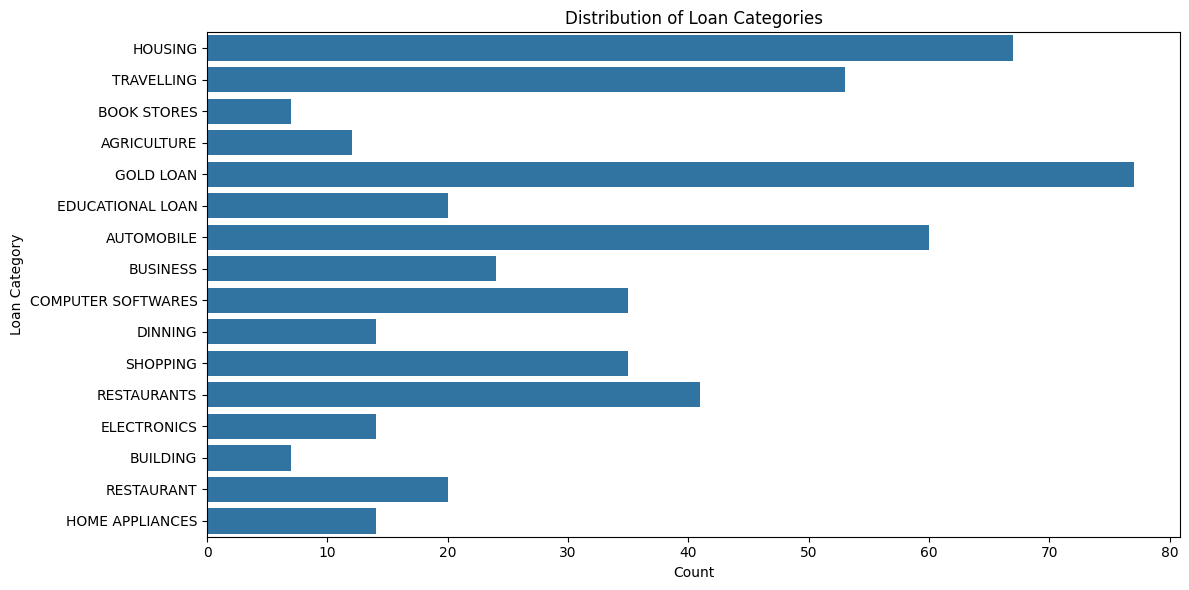

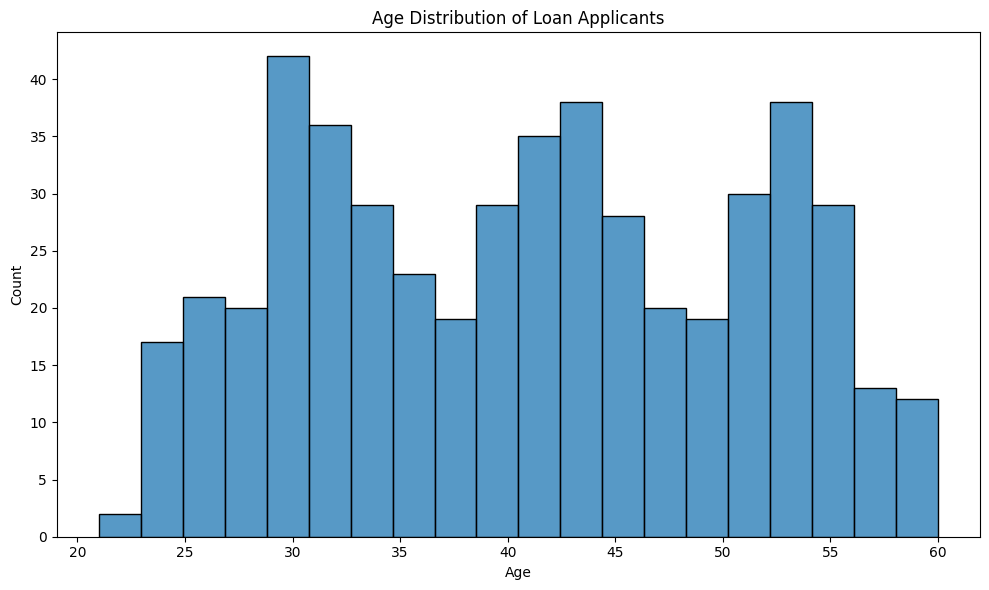

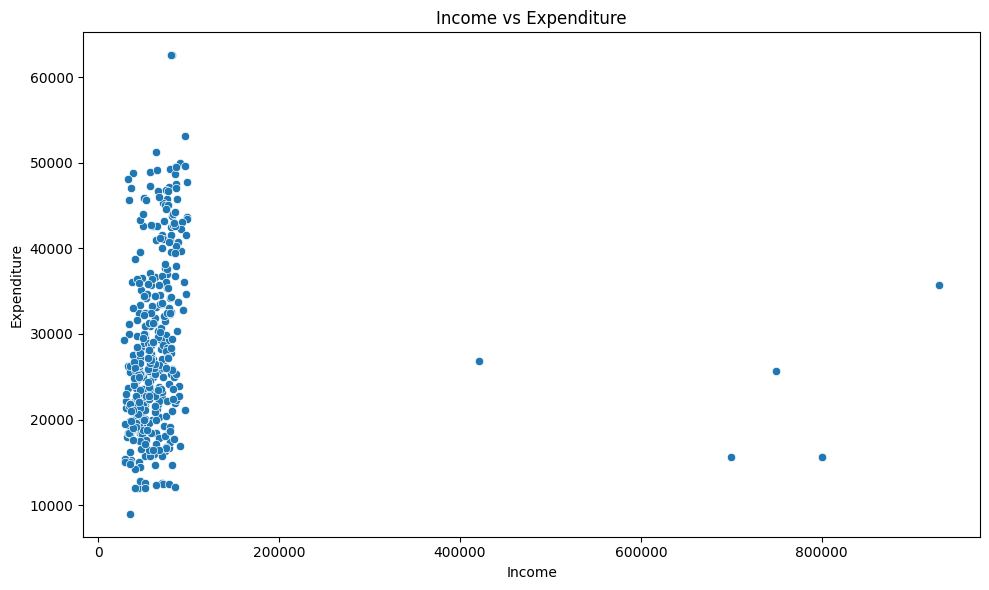

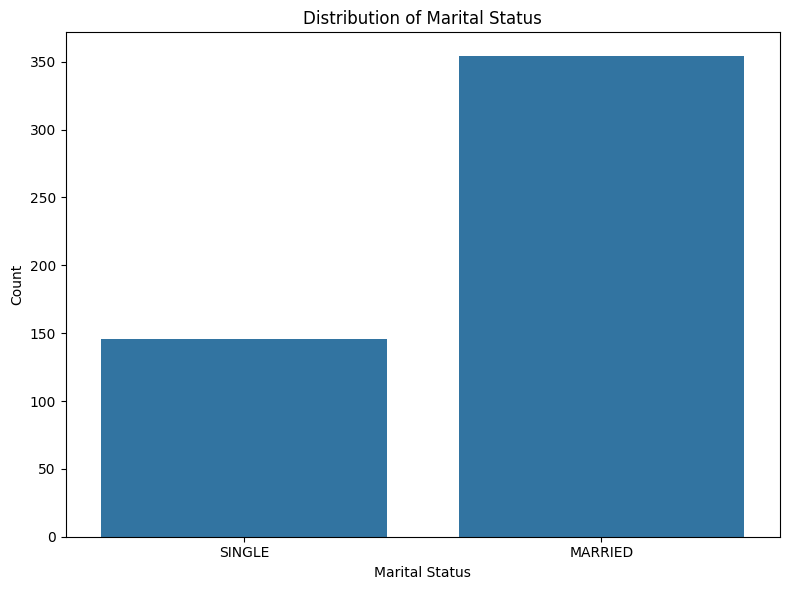

In [81]:
# Add a new markdown cell for EDA section
print("## Exploratory Data Analysis (EDA) ##")

# Import necessary libraries for visualization


# Convert Spark DataFrames to Pandas for easier visualization
loan_pd = df.toPandas()
credit_pd = dfc.toPandas()
txn_pd = txn.toPandas()

# 1. LOAN DATASET ANALYSIS
print("\n### 1. LOAN DATASET ANALYSIS ###")

# 1.1 Basic Statistics
print("\n#### 1.1 Basic Statistics ####")
loan_stats = df.summary().toPandas()
print(loan_stats)

# 1.2 Loan Category Distribution
plt.figure(figsize=(12, 6))
loan_category_counts = df.groupBy("Loan Category").count().toPandas()
sns.barplot(x="count", y="Loan Category", data=loan_category_counts)
plt.title("Distribution of Loan Categories")
plt.xlabel("Count")
plt.ylabel("Loan Category")
plt.tight_layout()
plt.show()

# 1.3 Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=loan_pd, x="Age", bins=20)
plt.title("Age Distribution of Loan Applicants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 1.4 Income vs Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_pd, x="Income", y="Expenditure")
plt.title("Income vs Expenditure")
plt.xlabel("Income")
plt.ylabel("Expenditure")
plt.tight_layout()
plt.show()

# 1.5 Marital Status Distribution
plt.figure(figsize=(8, 6))
marital_counts = df.groupBy("Marital Status").count().toPandas()
sns.barplot(x="Marital Status", y="count", data=marital_counts)
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



In [82]:
df.count()

500

In [83]:
df.distinct().count()

500

In [84]:
#number of loans in each category
df.groupBy("Loan Category").count().orderBy("count", ascending = False).show()

+------------------+-----+
|     Loan Category|count|
+------------------+-----+
|         GOLD LOAN|   77|
|           HOUSING|   67|
|        AUTOMOBILE|   60|
|        TRAVELLING|   53|
|       RESTAURANTS|   41|
|COMPUTER SOFTWARES|   35|
|          SHOPPING|   35|
|          BUSINESS|   24|
|  EDUCATIONAL LOAN|   20|
|        RESTAURANT|   20|
|           DINNING|   14|
|       ELECTRONICS|   14|
|   HOME APPLIANCES|   14|
|       AGRICULTURE|   12|
|       BOOK STORES|    7|
|          BUILDING|    7|
+------------------+-----+



In [85]:
#number of people who have taken more than 1 lack loan
df.filter(df["Loan Amount"]>"1,00,000").count()

379

In [86]:
#number of people with income greater than 60000 rupees
df.filter(df["Income"]>"60000").count()

198

In [87]:
#number of people with 2 or more returned cheques and income less than 50000
df.filter((df[" Returned Cheque"]>"1") & (df["Income"]<"50000")).count()

137

In [88]:
#number of people with 2 or more returned cheques and are single
df.filter((df[" Returned Cheque"]>"1") & (df["Marital Status"]<"SINGLE")).count()

283

In [89]:
#number of people with expenditure over 50000 a month 
df.filter((df["Expenditure"]>"50000")).show()

+-----------+---+------+---------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|Customer_ID|Age|Gender|     Occupation|Marital Status|Family Size|Income|Expenditure|Use Frequency|Loan Category|Loan Amount|Overdue| Debt Record| Returned Cheque| Dishonour of Bill|
+-----------+---+------+---------------+--------------+-----------+------+-----------+-------------+-------------+-----------+-------+------------+----------------+------------------+
|    IB14158| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 80000|      62541|            2|   AUTOMOBILE| 20,45,789 |      1|      16,599|               2|                 3|
|    IB14176| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 80000|      62541|            2|      HOUSING| 20,45,789 |      1|      16,599|               2|                 3|
|    IB14204| 54|  MALE|AIRPORT OFFICER|       MARRIED|          6| 81000|      

# CREDIT CARD DATASET #

In [90]:
dfc = spark.read.csv("credit card.csv", inferSchema = True, header = True)


In [91]:
dfc.printSchema()

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [92]:
len(dfc.columns)

13

In [93]:
dfc.count()

10000

In [94]:
dfc.distinct().count()

10000

In [95]:
dfc.show(5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|             0|       93826.63|     0|
|        5|  15737888|Mitchell|        850|    Spain|Female| 4

In [96]:
#number of members who are elgible for credit card
dfc.filter(dfc["CreditScore"]>700).count()

3116

In [97]:
#number of members who are  elgible and active in the bank
dfc.filter((dfc["IsActiveMember"]==1) & (dfc["CreditScore"]>700)).count()

1637

In [98]:
#credit card users in Spain 
dfc.filter(dfc["Geography"]=="Spain").show()

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+--------------+---------------+------+
|        2|  15647311|     Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|             1|      112542.58|     0|
|        5|  15737888| Mitchell|        850|    Spain|Female| 43|     2|125510.82|            1|             1|        79084.1|     0|
|        6|  15574012|      Chu|        645|    Spain|  Male| 44|     8|113755.78|            2|             0|      149756.71|     1|
|       12|  15737173|  Andrews|        497|    Spain|  Male| 24|     3|      0.0|            2|             0|       76390.01|     0|
|       15|  15600882|    Scott|        635|    Spain|F


### 2. CREDIT CARD DATASET ANALYSIS ###

#### 2.1 Basic Statistics ####
  summary           RowNumber         CustomerId Surname        CreditScore  \
0   count               10000              10000   10000              10000   
1    mean              5000.5    1.56909405694E7    None           650.5288   
2  stddev  2886.8956799071675  71936.18612274907    None  96.65329873613035   
3     min                   1           15565701   Abazu                350   
4     25%                2499           15628420    None                584   
5     50%                4999           15690731    None                652   
6     75%                7499           15753215    None                717   
7     max               10000           15815690  Zuyeva                850   

  Geography  Gender                 Age              Tenure  \
0     10000   10000               10000               10000   
1      None    None             38.9218              5.0128   
2      None    None  10.48

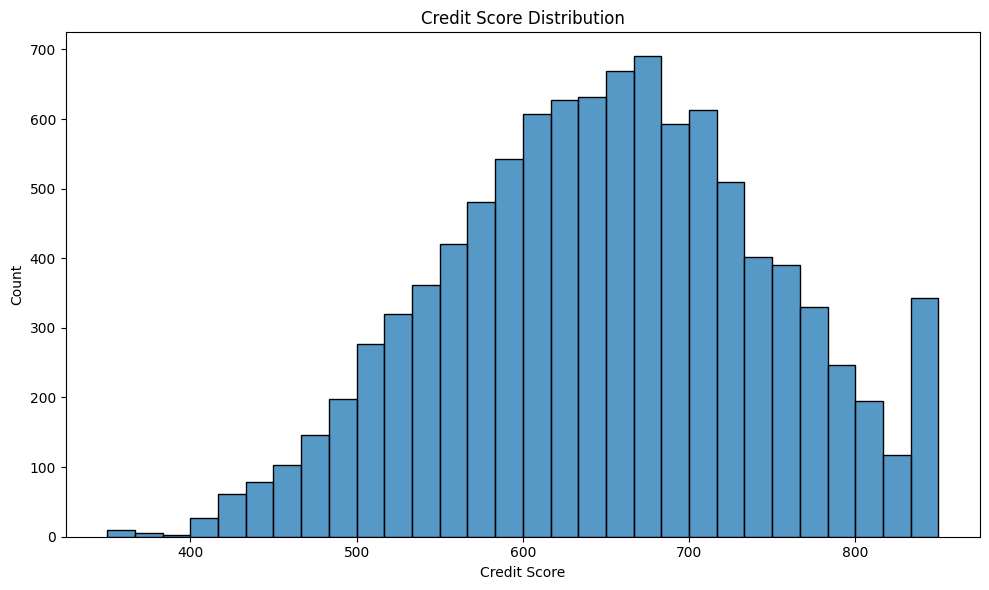

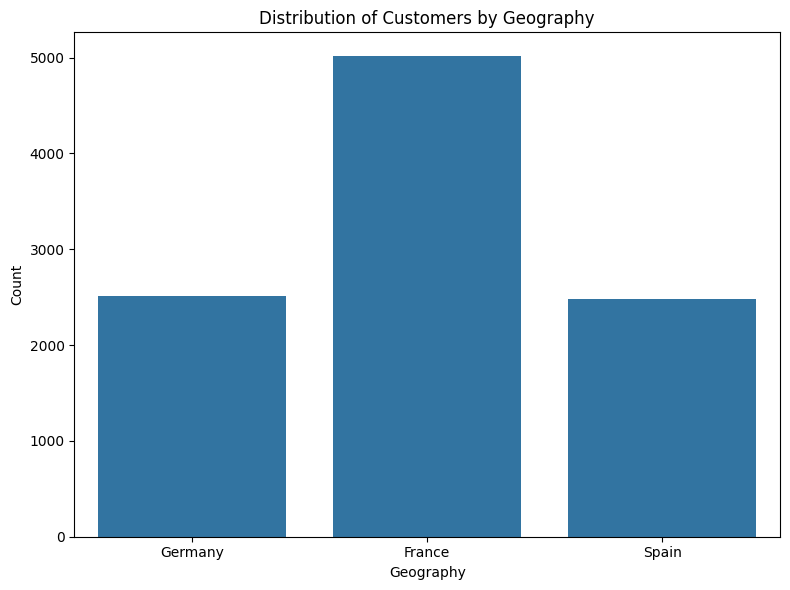

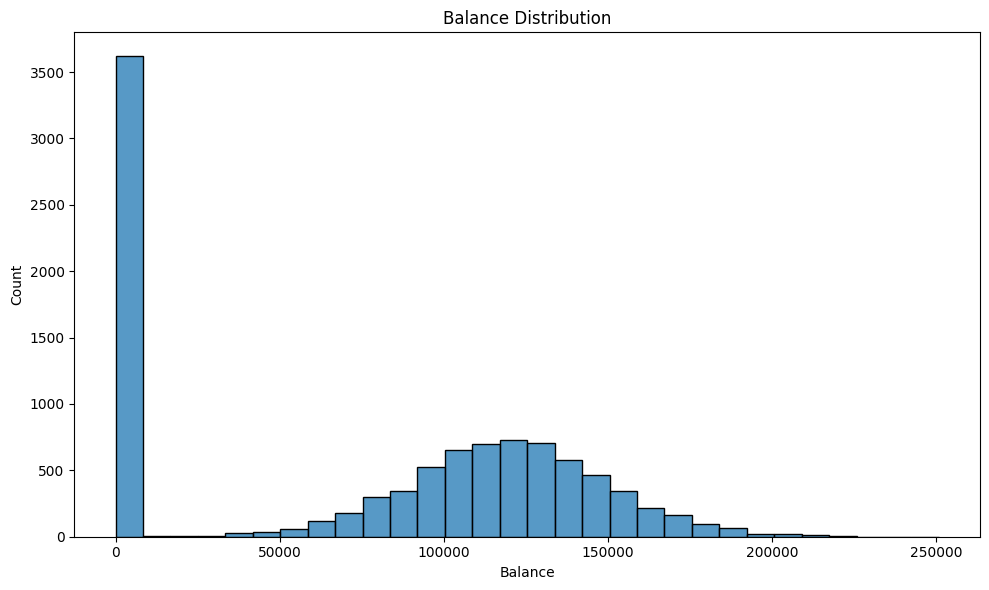

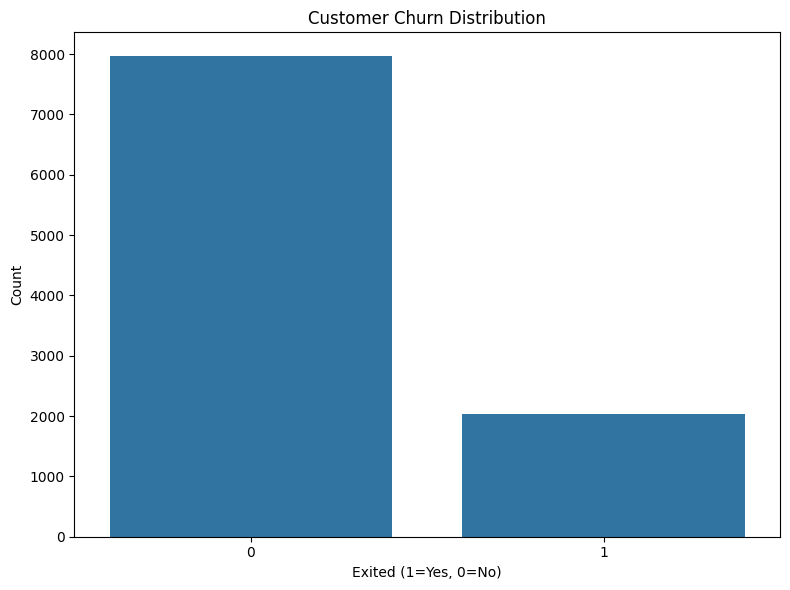

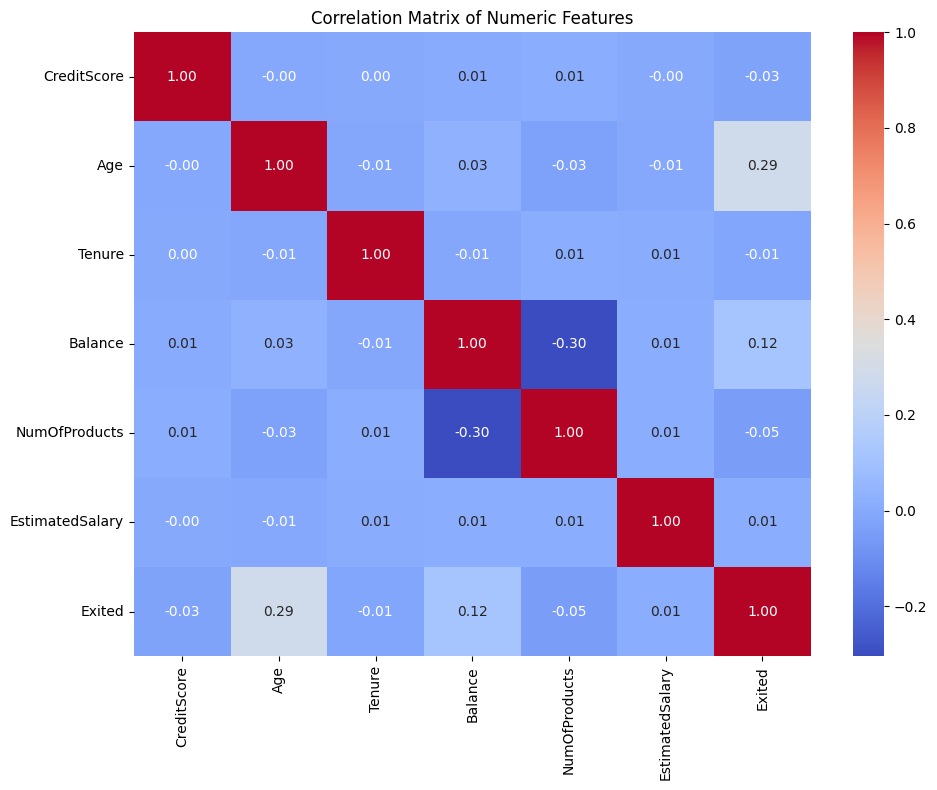

In [99]:
# 2. CREDIT CARD DATASET ANALYSIS
print("\n### 2. CREDIT CARD DATASET ANALYSIS ###")

# 2.1 Basic Statistics
print("\n#### 2.1 Basic Statistics ####")
credit_stats = dfc.summary().toPandas()
print(credit_stats)

# 2.2 Credit Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_pd, x="CreditScore", bins=30)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2.3 Geography Distribution
plt.figure(figsize=(8, 6))
geo_counts = dfc.groupBy("Geography").count().toPandas()
sns.barplot(x="Geography", y="count", data=geo_counts)
plt.title("Distribution of Customers by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2.4 Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_pd, x="Balance", bins=30)
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2.5 Churn Analysis
plt.figure(figsize=(8, 6))
churn_counts = dfc.groupBy("Exited").count().toPandas()
sns.barplot(x="Exited", y="count", data=churn_counts)
plt.title("Customer Churn Distribution")
plt.xlabel("Exited (1=Yes, 0=No)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2.6 Correlation Analysis
numeric_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Exited"]
correlation_matrix = dfc.select(numeric_cols).toPandas().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

In [100]:
dfc.filter((dfc["EstimatedSalary"]>100000) & (dfc["Exited"]==1)).count()

1044

In [101]:
dfc.filter((dfc["EstimatedSalary"]<100000) & (dfc["NumOfProducts"]>1)).count()

2432

# TRANSACTION DATASET #

In [102]:
txn = spark.read.csv("txn.csv", inferSchema=True, header =True)

In [103]:
txn.printSchema()

root
 |-- Account No: string (nullable = true)
 |-- TRANSACTION DETAILS: string (nullable = true)
 |-- VALUE DATE: string (nullable = true)
 |--  WITHDRAWAL AMT : double (nullable = true)
 |--  DEPOSIT AMT : double (nullable = true)
 |-- BALANCE AMT: double (nullable = true)



In [104]:
#COUNT OF TRANSACTION ON EVERY ACCOUNT
txn.groupBy("Account No").count().show()

+-------------+-----+
|   Account No|count|
+-------------+-----+
|409000438611'| 4588|
|     1196711'|10536|
|     1196428'|48779|
|409000493210'| 6014|
|409000611074'| 1093|
|409000425051'|  802|
|409000405747'|   51|
|409000493201'| 1044|
|409000438620'|13454|
|409000362497'|29840|
+-------------+-----+



In [105]:
#Maximum withdrawal amount
txn.groupBy("Account No").max(" WITHDRAWAL AMT ").orderBy("max( WITHDRAWAL AMT )", ascending = False).show()

+-------------+---------------------+
|   Account No|max( WITHDRAWAL AMT )|
+-------------+---------------------+
|     1196711'|        4.594475464E8|
|409000438620'|                4.0E8|
|409000425051'|               3.54E8|
|409000438611'|                2.4E8|
|409000405747'|                1.7E8|
|     1196428'|                1.5E8|
|409000362497'|        1.413662392E8|
|409000493210'|                1.5E7|
|409000493201'|            2500000.0|
|409000611074'|             912000.0|
+-------------+---------------------+



In [106]:
#MINIMUM WITHDRAWAL AMOUNT OF AN ACCOUNT
txn.groupBy("Account No").min(" WITHDRAWAL AMT ").orderBy("min( WITHDRAWAL AMT )").show()

+-------------+---------------------+
|   Account No|min( WITHDRAWAL AMT )|
+-------------+---------------------+
|409000493210'|                 0.01|
|409000438611'|                  0.2|
|     1196711'|                 0.25|
|     1196428'|                 0.25|
|409000438620'|                 0.34|
|409000362497'|                 0.97|
|409000425051'|                 1.25|
|409000493201'|                  2.1|
|409000405747'|                 21.0|
|409000611074'|                120.0|
+-------------+---------------------+



In [107]:
#MAXIMUM DEPOSIT AMOUNT OF AN ACCOUNT
txn.groupBy("Account No").max(" DEPOSIT AMT ").orderBy("max( DEPOSIT AMT )", ascending = False).show()

+-------------+------------------+
|   Account No|max( DEPOSIT AMT )|
+-------------+------------------+
|409000438620'|           5.448E8|
|     1196711'|             5.0E8|
|     1196428'|     2.119594422E8|
|409000405747'|           2.021E8|
|409000362497'|             2.0E8|
|409000438611'|          1.7025E8|
|409000493210'|             1.5E7|
|409000425051'|             1.5E7|
|409000611074'|         3000000.0|
|409000493201'|         1000000.0|
+-------------+------------------+



In [108]:
#MINIMUM DEPOSIT AMOUNT OF AN ACCOUNT
txn.groupBy("Account No").min(" DEPOSIT AMT ").orderBy("min( DEPOSIT AMT )").show()

+-------------+------------------+
|   Account No|min( DEPOSIT AMT )|
+-------------+------------------+
|409000493210'|              0.01|
|409000438611'|              0.03|
|409000362497'|              0.03|
|409000438620'|              0.07|
|409000493201'|               0.9|
|     1196428'|               1.0|
|409000425051'|               1.0|
|     1196711'|              1.01|
|409000405747'|             500.0|
|409000611074'|            1320.0|
+-------------+------------------+



In [109]:
#sum of balance in every bank account
txn.groupBy("Account No").sum("BALANCE AMT").show()

+-------------+--------------------+
|   Account No|    sum(BALANCE AMT)|
+-------------+--------------------+
|409000438611'|-2.49486577068339...|
|     1196711'|-1.60476498101275E13|
|     1196428'| -8.1418498130721E13|
|409000493210'|-3.27584952132095...|
|409000611074'|       1.615533622E9|
|409000425051'|-3.77211841164998...|
|409000405747'|-2.43108047067000...|
|409000493201'|1.0420831829499985E9|
|409000438620'|-7.12291867951358...|
|409000362497'| -5.2860004792808E13|
+-------------+--------------------+



In [110]:
#Number of transaction on each date
txn.groupBy("VALUE DATE").count().orderBy("count", ascending = False).show()

+----------+-----+
|VALUE DATE|count|
+----------+-----+
| 27-Jul-17|  567|
| 13-Aug-18|  463|
|  8-Nov-17|  402|
|  7-Oct-17|  382|
| 10-Jul-18|  374|
| 12-Dec-17|  367|
| 12-Sep-18|  365|
|  9-Aug-18|  360|
| 19-Sep-17|  358|
| 16-Mar-17|  353|
| 10-Sep-18|  344|
| 14-Jul-17|  333|
|  7-Mar-18|  319|
| 11-Oct-18|  303|
| 22-Aug-17|  301|
|  9-Jan-18|  299|
|  9-Oct-18|  297|
| 20-Apr-18|  296|
|  9-Jul-18|  292|
|  7-Apr-18|  291|
+----------+-----+
only showing top 20 rows



In [111]:
#List of customers with withdrawal amount more than 1 lakh
txn.select("Account No","TRANSACTION DETAILS"," WITHDRAWAL AMT ").filter(txn[" WITHDRAWAL AMT "]>100000).show()

+-------------+--------------------+----------------+
|   Account No| TRANSACTION DETAILS| WITHDRAWAL AMT |
+-------------+--------------------+----------------+
|409000611074'|INDO GIBL Indiafo...|        133900.0|
|409000611074'|INDO GIBL Indiafo...|        195800.0|
|409000611074'|INDO GIBL Indiafo...|        143800.0|
|409000611074'|INDO GIBL Indiafo...|        331650.0|
|409000611074'|INDO GIBL Indiafo...|        129000.0|
|409000611074'|INDO GIBL Indiafo...|        230013.0|
|409000611074'|INDO GIBL Indiafo...|        367900.0|
|409000611074'|INDO GIBL Indiafo...|        108000.0|
|409000611074'|INDO GIBL Indiafo...|        141000.0|
|409000611074'|INDO GIBL Indiafo...|        206000.0|
|409000611074'|INDO GIBL Indiafo...|        242300.0|
|409000611074'|INDO GIBL Indiafo...|        113250.0|
|409000611074'|INDO GIBL Indiafo...|        206900.0|
|409000611074'|INDO GIBL Indiafo...|        276000.0|
|409000611074'|INDO GIBL Indiafo...|        171000.0|
|409000611074'|INDO GIBL Ind


### 3. TRANSACTION DATASET ANALYSIS ###

#### 3.1 Basic Statistics ####
  summary     Account No        TRANSACTION DETAILS VALUE DATE  \
0   count         116201                     113702     116201   
1    mean           None       3.675022545399418E15       None   
2  stddev           None     1.49342569853758688E17       None   
3     min       1196428'  (SR1239979079) REJ INVALI   1-Apr-17   
4     25%           None                    6.33E11       None   
5     50%           None                    7.21E11       None   
6     75%           None                    7.25E11       None   
7     max  409000611074'  ZEN LEFIN PVT LTD1702245A   9-Sep-16   

        WITHDRAWAL AMT        DEPOSIT AMT             BALANCE AMT  
0                 53549              62652                 116201  
1     4489189.943506325  3806585.828440277  -1.4048520409591005E9  
2  1.0848504204717927E7  8683093.407864038    5.348201823458226E8  
3                  0.01               0.01         -2.045201

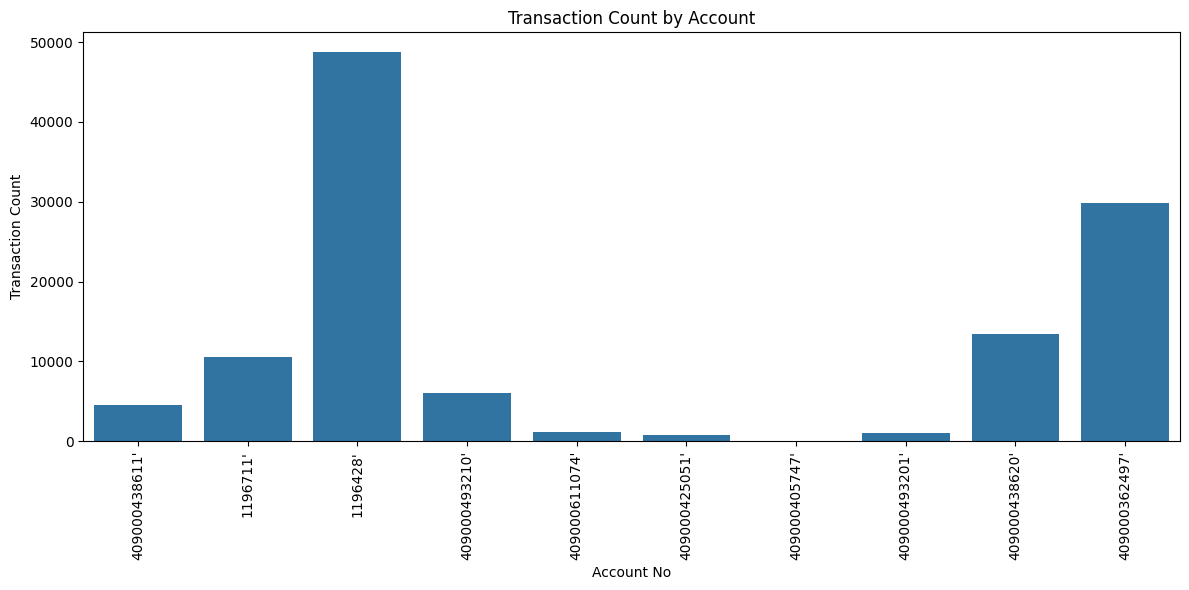

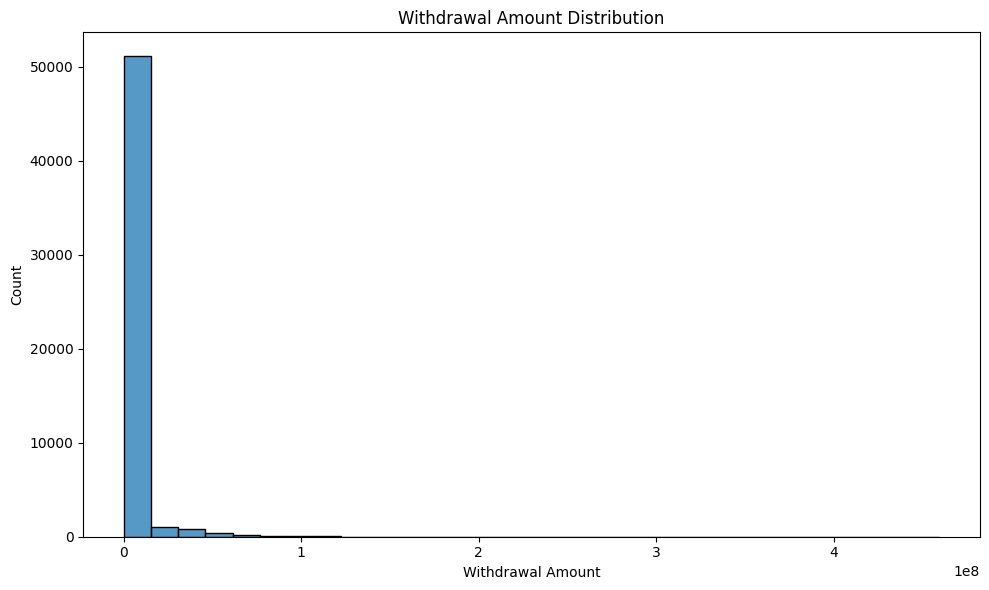

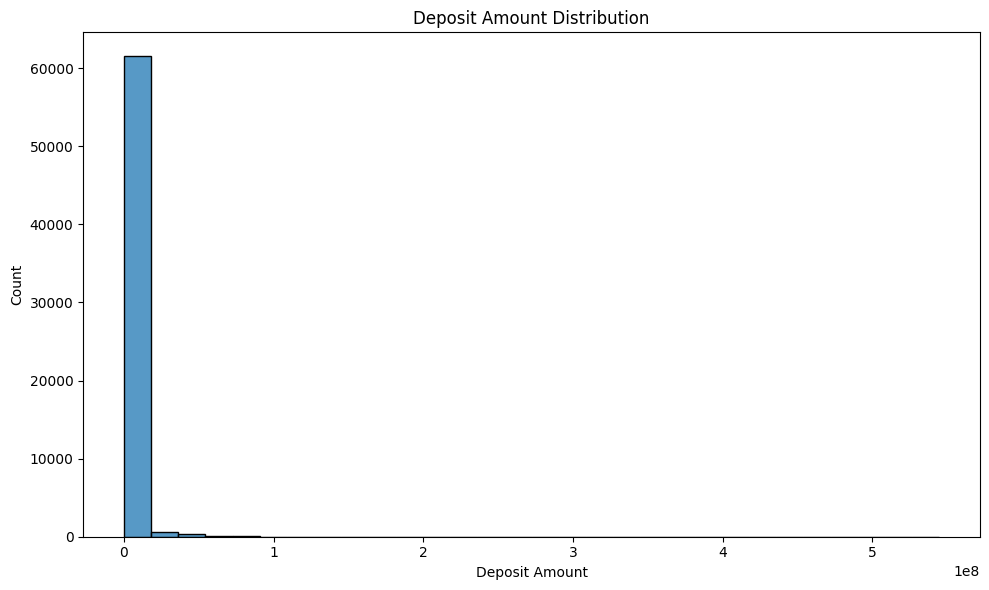

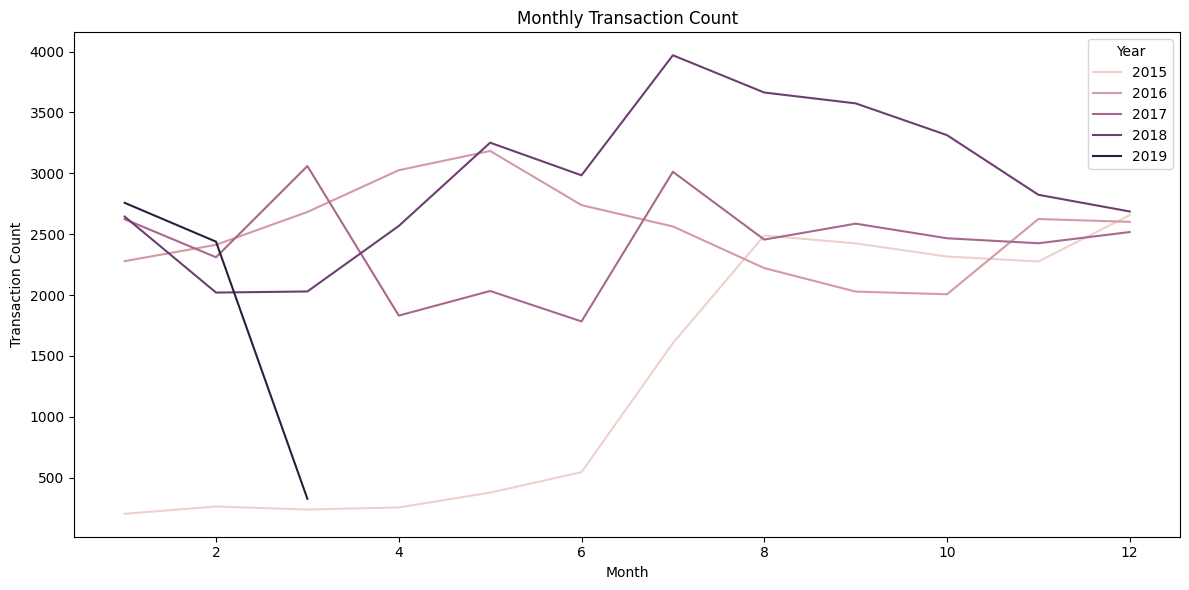

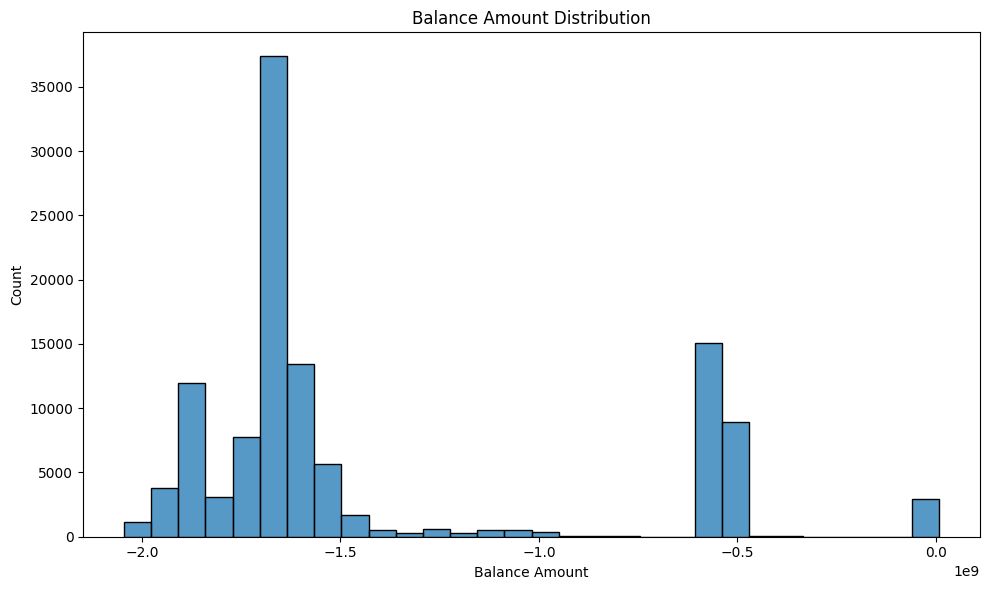

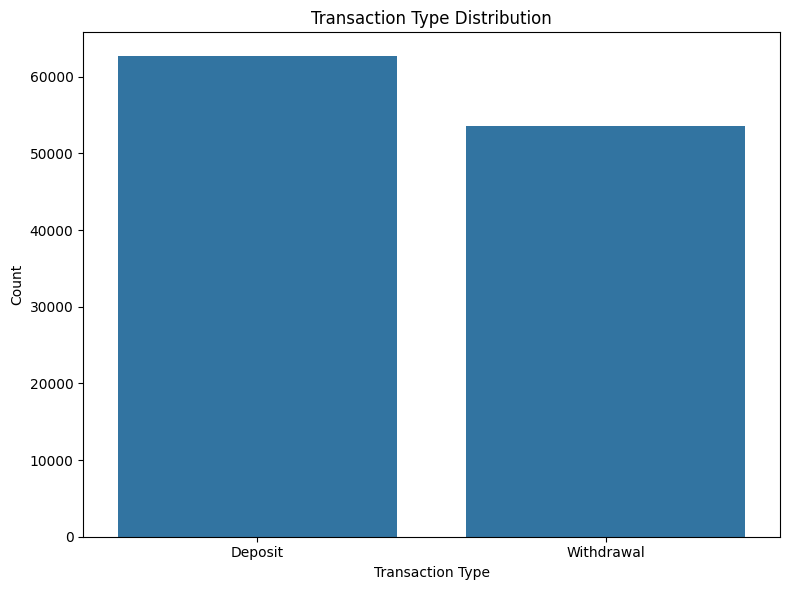


Large Withdrawals (> 15000000.00): 2491
Large Deposits (> 14900000.00): 5666


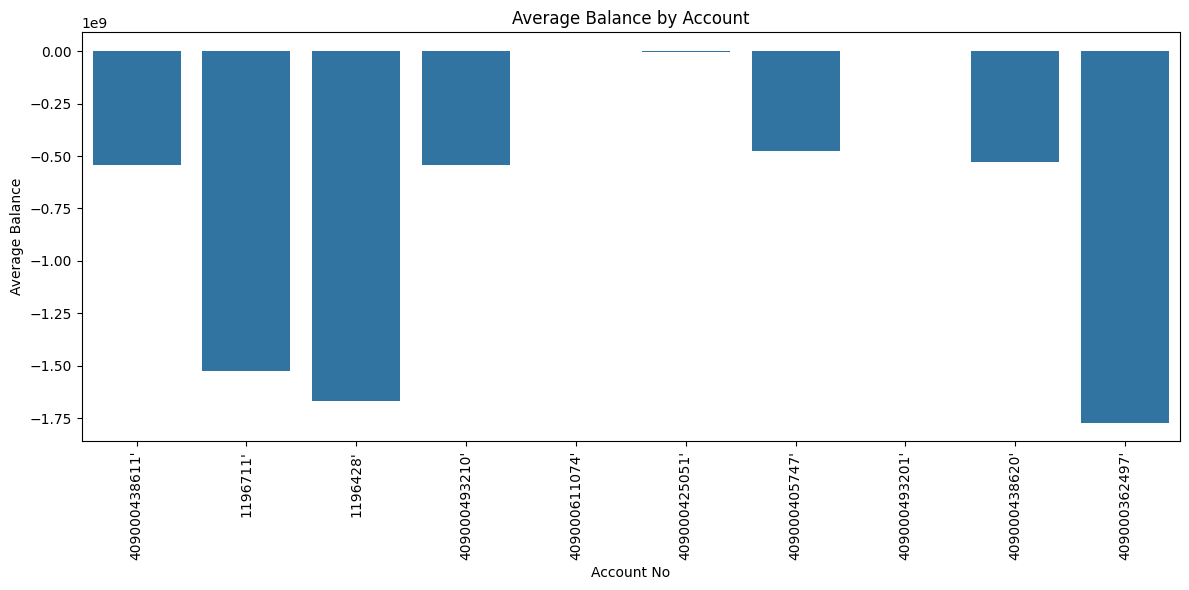

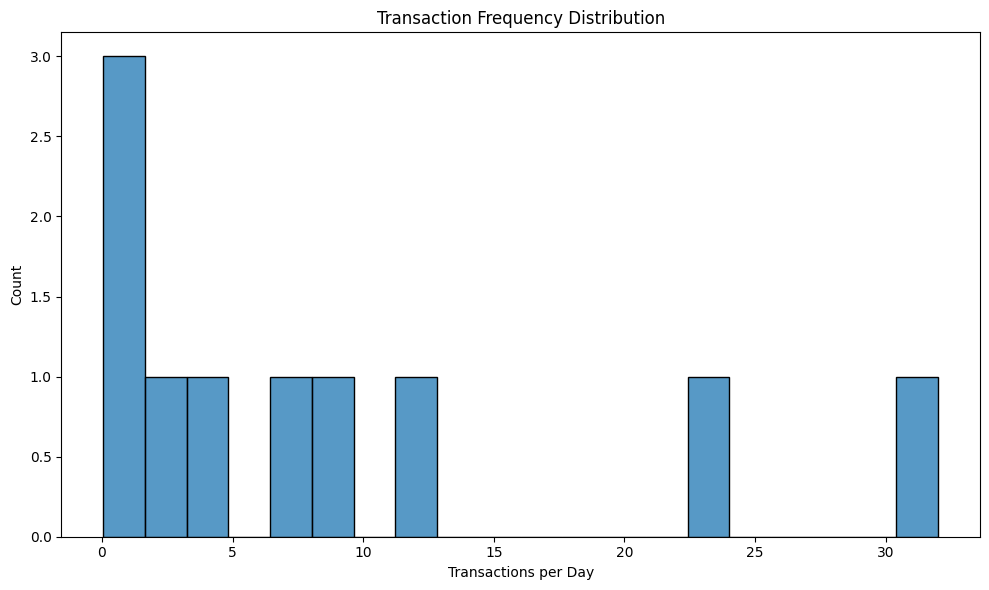

In [112]:
# 3. TRANSACTION DATASET ANALYSIS
print("\n### 3. TRANSACTION DATASET ANALYSIS ###")

# 3.1 Basic Statistics
print("\n#### 3.1 Basic Statistics ####")
txn_stats = txn.summary().toPandas()
print(txn_stats)

# 3.2 Transaction Count by Account
plt.figure(figsize=(12, 6))
account_counts = txn.groupBy("Account No").count().toPandas()
sns.barplot(x="Account No", y="count", data=account_counts)
plt.title("Transaction Count by Account")
plt.xlabel("Account No")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3.3 Withdrawal Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=txn_pd, x=" WITHDRAWAL AMT ", bins=30)
plt.title("Withdrawal Amount Distribution")
plt.xlabel("Withdrawal Amount")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3.4 Deposit Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=txn_pd, x=" DEPOSIT AMT ", bins=30)
plt.title("Deposit Amount Distribution")
plt.xlabel("Deposit Amount")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3.5 Transaction Date Analysis
# Convert date string to datetime
txn_pd["VALUE DATE"] = pd.to_datetime(txn_pd["VALUE DATE"], format="%d-%b-%y")
txn_pd["Month"] = txn_pd["VALUE DATE"].dt.month
txn_pd["Year"] = txn_pd["VALUE DATE"].dt.year

# Monthly transaction count
monthly_counts = txn_pd.groupby(["Year", "Month"]).size().reset_index(name="count")
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x="Month", y="count", hue="Year")
plt.title("Monthly Transaction Count")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.tight_layout()
plt.show()

# 3.6 Balance Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=txn_pd, x="BALANCE AMT", bins=30)
plt.title("Balance Amount Distribution")
plt.xlabel("Balance Amount")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3.7 Transaction Type Analysis
# Create a column for transaction type
txn_pd["Transaction_Type"] = np.where(txn_pd[" WITHDRAWAL AMT "] > 0, "Withdrawal", "Deposit")
txn_type_counts = txn_pd["Transaction_Type"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=txn_type_counts.index, y=txn_type_counts.values)
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3.8 Large Transaction Analysis
# Define large transactions (e.g., > 90th percentile)
withdrawal_threshold = txn_pd[" WITHDRAWAL AMT "].quantile(0.9)
deposit_threshold = txn_pd[" DEPOSIT AMT "].quantile(0.9)

large_withdrawals = txn_pd[txn_pd[" WITHDRAWAL AMT "] > withdrawal_threshold]
large_deposits = txn_pd[txn_pd[" DEPOSIT AMT "] > deposit_threshold]

print(f"\nLarge Withdrawals (> {withdrawal_threshold:.2f}): {len(large_withdrawals)}")
print(f"Large Deposits (> {deposit_threshold:.2f}): {len(large_deposits)}")

# 3.9 Account Balance Trends
# Calculate average balance by account
account_balance = txn.groupBy("Account No").agg(
    avg("BALANCE AMT").alias("avg_balance"),
    min("BALANCE AMT").alias("min_balance"),
    max("BALANCE AMT").alias("max_balance")
).toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(x="Account No", y="avg_balance", data=account_balance)
plt.title("Average Balance by Account")
plt.xlabel("Account No")
plt.ylabel("Average Balance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3.10 Transaction Frequency Analysis
# Calculate transactions per day for each account
txn_pd["VALUE DATE"] = pd.to_datetime(txn_pd["VALUE DATE"], format="%d-%b-%y")
account_dates = txn_pd.groupby("Account No").agg({
    "VALUE DATE": ["min", "max", "count"]
}).reset_index()

account_dates.columns = ["Account No", "first_date", "last_date", "transaction_count"]
account_dates["days_between"] = (account_dates["last_date"] - account_dates["first_date"]).dt.days
account_dates["transactions_per_day"] = account_dates["transaction_count"] / account_dates["days_between"]

plt.figure(figsize=(10, 6))
sns.histplot(data=account_dates, x="transactions_per_day", bins=20)
plt.title("Transaction Frequency Distribution")
plt.xlabel("Transactions per Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



<div style="background-color: #241f33; padding: 20px; color: white; font-size: 32px; font-weight: bold;">
  Machine Learning Models
</div>

In [113]:
# Import required ML libraries
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import BinaryClassificationEvaluator, RegressionEvaluator

In [114]:
# Move string-based loan feature columns to categorical
categorical_cols = ["Gender", "Occupation", "Marital Status", "Loan Category", 
                    "Debt Record", "Returned Cheque", "Dishonour of Bill"]

# Only use numeric features in assembler
loan_features = ["Age", "Income", "Expenditure", "Use Frequency", "Overdue"]


In [115]:
# Index and encode categorical features
indexers = [StringIndexer(inputCol=c, outputCol=c + "_idx") for c in categorical_cols]
encoders = [OneHotEncoder(inputCols=[c + "_idx"], outputCols=[c + "_vec"]) for c in categorical_cols]

# Combine categorical vectors + numeric columns into features
feature_cols = [c + "_vec" for c in categorical_cols] + loan_features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")


In [116]:
df = df.select([col(c).alias(c.strip()) for c in df.columns])


In [117]:
df.select("Debt Record").distinct().show()
df.printSchema()


+-----------+
|Debt Record|
+-----------+
|      31432|
|      29454|
|      45670|
|      19990|
|      15947|
|      54198|
|      24580|
|      64718|
|      34044|
|      47624|
|      20435|
|      62858|
|      56157|
|      56137|
|      76545|
|      58193|
|      49464|
|      79932|
|     89,652|
|     24,000|
+-----------+
only showing top 20 rows

root
 |-- Customer_ID: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Marital Status: string (nullable = true)
 |-- Family Size: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Expenditure: integer (nullable = true)
 |-- Use Frequency: integer (nullable = true)
 |-- Loan Category: string (nullable = true)
 |-- Loan Amount: string (nullable = true)
 |-- Overdue: integer (nullable = true)
 |-- Debt Record: string (nullable = true)
 |-- Returned Cheque: integer (nullable = true)
 |-- Dishonour of Bill: integer (nul

In [118]:
# These are now all string columns that need encoding
categorical_cols = ["Gender", "Occupation", "Marital Status", "Loan Category", 
                    "Debt Record", "Returned Cheque", "Dishonour of Bill"]

# These are all guaranteed to be numeric
loan_features = ["Age", "Income", "Expenditure", "Use Frequency", "Overdue"]


In [119]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Index and encode categorical features
indexers = [StringIndexer(inputCol=c, outputCol=c + "_idx", handleInvalid="keep") for c in categorical_cols]
encoders = [OneHotEncoder(inputCols=[c + "_idx"], outputCols=[c + "_vec"]) for c in categorical_cols]

# Combine encoded vectors + numeric columns
feature_cols = [c + "_vec" for c in categorical_cols] + loan_features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Build pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])


In [120]:
# Create target column
loan_df_ml = df.withColumn("default_risk", when(coalesce(col("Overdue"), lit(0)) > 3, 1.0).otherwise(0.0))

# Fit pipeline
model = pipeline.fit(loan_df_ml)
loan_df_ml = model.transform(loan_df_ml)


In [121]:
# Fill nulls in numeric columns with 0 or some default (like median/mean if known)
loan_df_ml = loan_df_ml.fillna({
    "Age": 0,
    "Income": 0,
    "Expenditure": 0,
    "Use Frequency": 0,
    "Overdue": 0
})


In [122]:
loan_df_ml = loan_df_ml.dropna(subset=loan_features)


In [123]:
# Fill nulls in numeric columns
loan_df_ml = loan_df_ml.fillna({
    "Age": 0,
    "Income": 0,
    "Expenditure": 0,
    "Use Frequency": 0,
    "Overdue": 0
})


In [124]:
from pyspark.sql.functions import col, when, lit, coalesce
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator


## 1. Customer Churn Prediction ##

In [125]:
# Prepare features for churn prediction
churn_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Convert categorical columns to numeric
categorical_cols = ["Geography", "Gender"]
indexers = [StringIndexer(inputCol=c, outputCol=c+"_idx") for c in categorical_cols]
encoders = [OneHotEncoder(inputCols=[c+"_idx"], outputCols=[c+"_vec"]) for c in categorical_cols]

# Assemble features
feature_cols = [c+"_vec" for c in categorical_cols] + churn_features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Create pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])
model = pipeline.fit(dfc)
credit_df_ml = model.transform(dfc)

# Split data
train_data, test_data = credit_df_ml.randomSplit([0.7, 0.3], seed=42)

# Train Logistic Regression model
lr = LogisticRegression(labelCol="Exited", featuresCol="features")
lr_model = lr.fit(train_data)

# Make predictions
predictions = lr_model.transform(test_data)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol="Exited")
auc = evaluator.evaluate(predictions)
print(f"Customer Churn Prediction AUC: {auc}")

Customer Churn Prediction AUC: 0.7479003875803041


## 2. Transaction Fraud Detection ##

In [126]:
# Prepare features for fraud detection
# Convert transaction amounts to numeric
txn_df_ml = txn.withColumn("withdrawal_amt", col(" WITHDRAWAL AMT ").cast("double"))
txn_df_ml = txn_df_ml.withColumn("deposit_amt", col(" DEPOSIT AMT ").cast("double"))
txn_df_ml = txn_df_ml.withColumn("balance_amt", col("BALANCE AMT").cast("double"))

# Create features
txn_df_ml = txn_df_ml.withColumn("transaction_size", 
                              when(col("withdrawal_amt").isNotNull(), col("withdrawal_amt"))
                              .otherwise(col("deposit_amt")))

# Calculate transaction statistics per account
account_stats = txn_df_ml.groupBy("Account No").agg(
    avg("transaction_size").alias("avg_transaction"),
    stddev("transaction_size").alias("std_transaction"),
    count("*").alias("transaction_count")
)

# Join statistics back to transactions
txn_df_ml = txn_df_ml.join(account_stats, "Account No")

# Create fraud indicator (example: transactions > 3 standard deviations from mean)
txn_df_ml = txn_df_ml.withColumn("fraud_indicator",
                              when(abs(col("transaction_size") - col("avg_transaction")) > 3 * col("std_transaction"), 1.0)
                              .otherwise(0.0))

# Prepare features for model
feature_cols = ["transaction_size", "avg_transaction", "std_transaction", "transaction_count"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Create pipeline
pipeline = Pipeline(stages=[assembler])
model = pipeline.fit(txn_df_ml)
txn_df_ml = model.transform(txn_df_ml)

# Split data
train_data, test_data = txn_df_ml.randomSplit([0.7, 0.3], seed=42)

# Train Random Forest model
rf = RandomForestClassifier(labelCol="fraud_indicator", featuresCol="features")
rf_model = rf.fit(train_data)

# Make predictions
predictions = rf_model.transform(test_data)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol="fraud_indicator")
auc = evaluator.evaluate(predictions)
print(f"Transaction Fraud Detection AUC: {auc}")

Transaction Fraud Detection AUC: 0.9939876194098133


## 3. Credit Score Prediction ##

In [127]:
# Prepare features for credit score prediction
credit_features = ["Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Convert categorical columns to numeric
categorical_cols = ["Geography", "Gender"]
indexers = [StringIndexer(inputCol=c, outputCol=c+"_idx") for c in categorical_cols]
encoders = [OneHotEncoder(inputCols=[c+"_idx"], outputCols=[c+"_vec"]) for c in categorical_cols]

# Assemble features
feature_cols = [c+"_vec" for c in categorical_cols] + credit_features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Create pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])
model = pipeline.fit(dfc)
credit_df_ml = model.transform(dfc)

# Split data
train_data, test_data = credit_df_ml.randomSplit([0.7, 0.3], seed=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(labelCol="CreditScore", featuresCol="features")
rf_model = rf.fit(train_data)

# Make predictions
predictions = rf_model.transform(test_data)

# Evaluate model
evaluator = RegressionEvaluator(labelCol="CreditScore", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Credit Score Prediction RMSE: {rmse}")

Credit Score Prediction RMSE: 96.94989645053869
